## Data Preparation

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [21]:
df = pd.read_csv('training_set_VU_DM.csv')

In [22]:
pd.set_option('display.max_columns', None)

### Removing non-relevant variables
#### The variables position and gross_booking_usd are only provided for the train set and not the test-set. but they are not used as target variable or anything, so i decided to remove them. Also, all the comp_diff_rate variables have a very high missing rate, so i would rely most on comp_inv and comp_rate since we can just categorize the missings as their own category. 

In [23]:
df = df.drop(['position', 'gross_bookings_usd', 'comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 
'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff'], axis=1)
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp2_rate,comp2_inv,comp3_rate,comp3_inv,comp4_rate,comp4_inv,comp5_rate,comp5_inv,comp6_rate,comp6_inv,comp7_rate,comp7_inv,comp8_rate,comp8_inv,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,-1.0,0.0,-1.0,0.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,-1.0,0.0,0,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0,0


### Recategorizing variables to categorical & change missings to own category
#### First I think its a good idea to change some variables to category since they have a lot of missings. Hence treating them as numeric is difficult to impute the missings (maybe median, but thats very general as well). So I think making categories makes more sense. You lose some information, but I think its more robust since there are no weird outliers or strange distributions. 

In [24]:
# Impute missings with own category 2
# Select columns
cols = ['comp1_rate', 'comp1_inv', 'comp2_rate', 'comp2_inv',
       'comp3_rate', 'comp3_inv', 'comp4_rate', 'comp4_inv',
       'comp5_rate', 'comp5_inv', 'comp6_rate', 'comp6_inv',
       'comp7_rate', 'comp7_inv', 'comp8_rate', 'comp8_inv']
# Replace missing values with 99 in selected categorical columns
df[cols] = df[cols].fillna(2)

# Set columns to integer
df[cols] = df[cols].astype('int64')


In [25]:
# Change visitor_hist_starrating to category and impute missings with 0
# round to integer
df['visitor_hist_starrating'] = df['visitor_hist_starrating'].round()

# Impute the missing values with 0
df['visitor_hist_starrating'].fillna(0, inplace=True)

# Convert the column to category data type
df['visitor_hist_starrating'] = df['visitor_hist_starrating'].astype('int64')


In [26]:
# Change srch_query_affinity_score to categorical and recoding missings to 99
# define the percentile ranges to create the bins
bins = [-np.inf, df['srch_query_affinity_score'].quantile(0.25), df['srch_query_affinity_score'].quantile(0.5), 
        df['srch_query_affinity_score'].quantile(0.75), np.inf]
labels = [1, 2, 3, 4]

# bin the values into categories based on the percentile ranges
df['srch_query_affinity_score'] = pd.cut(df['srch_query_affinity_score'], bins=bins, labels=labels)
df['srch_query_affinity_score'] = df['srch_query_affinity_score'].cat.add_categories([0])
df['srch_query_affinity_score'].fillna(value=0, inplace=True)
df['srch_query_affinity_score'] = df['srch_query_affinity_score'].astype('int64')

In [27]:
# Now do the same for visitor_hist_adr_usd
bins = [-np.inf, df['visitor_hist_adr_usd'].quantile(0.25), df['visitor_hist_adr_usd'].quantile(0.5), 
        df['visitor_hist_adr_usd'].quantile(0.75), np.inf]
labels = [1, 2, 3, 4]

# bin the values into categories based on the percentile ranges
df['visitor_hist_adr_usd'] = pd.cut(df['visitor_hist_adr_usd'], bins=bins, labels=labels)
df['visitor_hist_adr_usd'] = df['visitor_hist_adr_usd'].cat.add_categories([0])
df['visitor_hist_adr_usd'].fillna(value=0, inplace=True)
df['visitor_hist_adr_usd'] = df['visitor_hist_adr_usd'].astype('int64')

### Setting some specific values of numeric variables to missing
#### for Prop_starr_rating and prop_log_hist_price I think its good to set 0 to missing since it means there's no data available and then impute later on

In [28]:
#df['prop_starrating'] = df['prop_starrating'].replace(0, np.nan) # replace 0 with missing
df['prop_log_historical_price'] = df['prop_log_historical_price'].replace(0, np.nan) # replace 0 with missing

### Setting outliers and extreme values to missing
#### There are certain extreme values in the dataset for certain variables that we need to address. For now I chose to use the extreme interquartile range of magnitude 10 and set every value above this to missing

In [29]:
def detect_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 10 * iqr
    upper_bound = q3 + 10 * iqr
    return (df < lower_bound) | (df > upper_bound)

# Detect outliers in the DataFrame
# Select only relevant columns. Some of them have outliers but are meaningless. 
select_cols = ['price_usd', 'srch_length_of_stay', 'srch_booking_window', 
                'orig_destination_distance','prop_log_historical_price'] # select relevant columns

outliers = detect_outliers(df[select_cols])

# Recoding extremes to missing
df[select_cols] = df[select_cols].mask(outliers, np.nan)


In [30]:
# # Set the size of the plot
# fig, axes = plt.subplots(nrows=len(select_cols), ncols=1, figsize=(20, len(select_cols)*5))

# # Loop over each column and plot the time series on a separate subplot
# for i, col in enumerate(select_cols):
#     df.plot(ax=axes[i], x='date_time', y=col)
#     axes[i].set_xlabel('Date time')
#     axes[i].set_ylabel(col)
#     axes[i].set_title('Time Series of ' + col)

# # Adjust the layout and spacing of the subplots
# plt.tight_layout()

### Impute missings based on median
#### for the remaining variables (numeric) the easiest solution is to impute based on the median. I do not necesserily see an alternative (maybe SVD, but I don't know if its approriate), and it is a quick way to build some models.

In [31]:
# Get the count, number of unique values, and value counts (including missing values) for each column
counts = pd.DataFrame({'count': df.count(), 'unique': df.nunique(), 'missing': df.isnull().sum()})

# Print the result
counts

,count,unique,missing
srch_id,4958347,199795,0
date_time,4958347,198615,0
site_id,4958347,34,0
visitor_location_country_id,4958347,210,0
visitor_hist_starrating,4958347,6,0
visitor_hist_adr_usd,4958347,5,0
prop_country_id,4958347,172,0
prop_id,4958347,129113,0
prop_starrating,4958347,6,0
prop_review_score,4950983,10,7364


In [32]:
impute_cols= df.select_dtypes(include=['float', 'int']).columns.tolist()

# Exclude specific columns
exclude_cols = ['price_usd']
impute_cols = [col for col in impute_cols if col not in exclude_cols]

# THere are still some missings, so we can fill the remaining missings with the overall mean per variable. We can also decide to remove the rest
df[impute_cols] = df[impute_cols].fillna(df[impute_cols].median())

# The idea is to first impute missings by prop_country_id so we atleast take into account the country
df['price_usd'] = df.groupby('prop_country_id')['price_usd'].transform(lambda x: x.fillna(x.median()))

In [33]:
# Get the count, number of unique values, and value counts (including missing values) for each column
counts = pd.DataFrame({'count': df.count(), 'unique': df.nunique(), 'missing': df.isnull().sum()})

# Print the result
counts

,count,unique,missing
srch_id,4958347,199795,0
date_time,4958347,198615,0
site_id,4958347,34,0
visitor_location_country_id,4958347,210,0
visitor_hist_starrating,4958347,6,0
visitor_hist_adr_usd,4958347,5,0
prop_country_id,4958347,172,0
prop_id,4958347,129113,0
prop_starrating,4958347,6,0
prop_review_score,4958347,10,0


### Normalize numeric variables
#### Specifically with regards to the numeric variables (so excluding the booleans), I think it's good to normalize so that the scale is the same for all numeric variables.

In [34]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp2_rate', 'comp2_inv', 'comp3_rate', 'comp3_inv', 'comp4_rate',
       'comp4_inv', 'comp5_rate', 'comp5_inv', 'comp6_rate', 'comp6_inv',
       'comp7_rate', 'comp7_inv', 'comp8_rate', 'comp8_inv', 'click_bool',
       'booking_bool'],
      dtype='object')

In [35]:
# Select all float and integer columns
numeric_cols = ['prop_review_score', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'price_usd', 
                'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 
                'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance']

# Create a scaler instance
scaler = MinMaxScaler()

# Fit and transform the scaler on the selected columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [36]:
df.describe(include='all')

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp2_rate,comp2_inv,comp3_rate,comp3_inv,comp4_rate,comp4_inv,comp5_rate,comp5_inv,comp6_rate,comp6_inv,comp7_rate,comp7_inv,comp8_rate,comp8_inv,click_bool,booking_bool
count,4.958347e+06,4958347,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06
unique,NaN,198615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-11-02 14:04:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.663666e+05,NaN,9.953133e+00,1.753405e+02,1.719749e-01,1.275459e-01,1.739739e+02,7.007918e+04,3.180525e+00,7.556214e-01,6.346994e-01,4.115456e-01,1.168865e-01,7.458020e-01,1.282729e-01,2.156198e-01,1.404263e+04,6.244290e-02,7.678975e-02,1.215797e-01,3.894353e-02,1.578928e-02,5.022127e-01,4.000890e-02,8.611289e-02,2.959004e-01,1.963230e+00,1.948553e+00,1.201372e+00,1.157623e+00,1.386479e+00,1.353292e+00,1.874990e+00,1.868079e+00,1.113747e+00,1.072540e+00,1.909346e+00,1.898731e+00,1.882085e+00,1.862214e+00,1.203357e+00,1.202314e+00,4.474858e-02,2.791051e-02
std,9.611223e+04,NaN,7.646890e+00,6.591625e+01,7.635590e-01,6.052630e-01,6.834525e+01,4.060992e+04,1.051024e+00,2.099167e-01,4.815144e-01,2.193426e-01,1.431195e-01,1.044625e-01,9.015423e-02,4.112517e-01,8.111843e+03,9.007663e-02,1.065373e-01,1.071328e-01,8.139658e-02,5.960414e-02,4.999952e-01,1.685405e-01,1.472545e-01,4.564465e-01,2.539724e-01,3.162729e-01,1.003129e+00,9.826567e-01,9.512180e-01,9.310032e-01,5.071704e-01,4.914952e-01,1.043543e+00,9.905474e-01,4.202823e-01,4.352159e-01,4.753704e-01,5.023278e-01,1.045107e+00,9.836800e-01,2.067514e-01,1.647165e-01
min,1.000000e+00,NaN,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,8.293600e+04,NaN,5.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,1.000000e+02,3.501000e+04,3.000000e+00,7.000000e-01,0.000000e+00,2.564470e-01,2.880000e-02,6.826087e-01,7.176630e-02,0.000000e+00,7.101000e+03,0.000000e+00,8.196721e-03,1.250000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.944006e-02,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e

In [37]:
# df.to_csv('processed_df.csv', index=False)

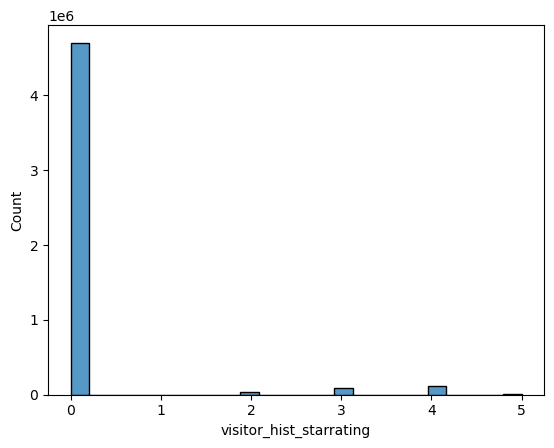

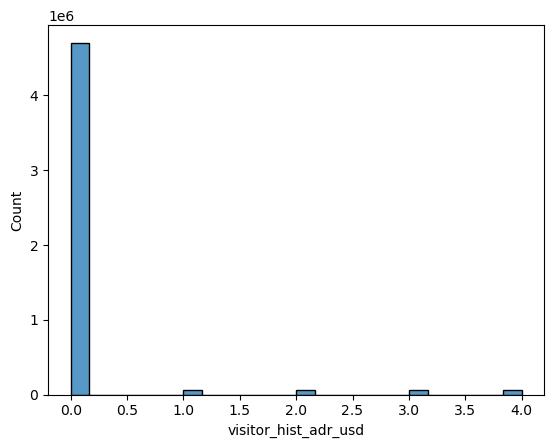

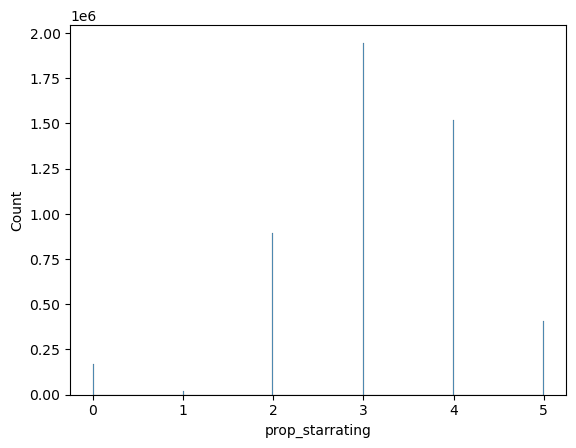

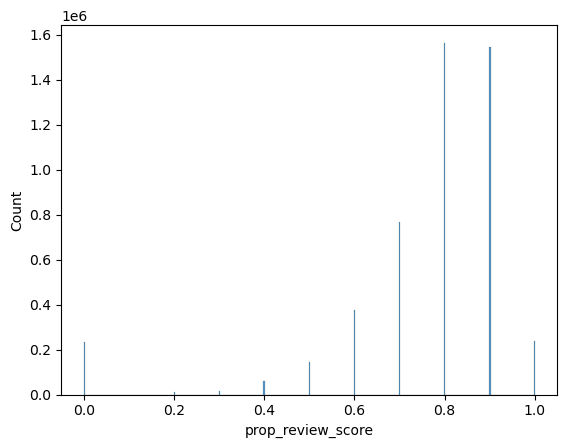

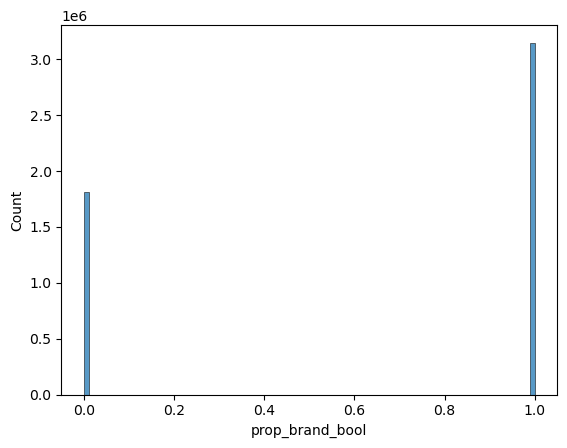

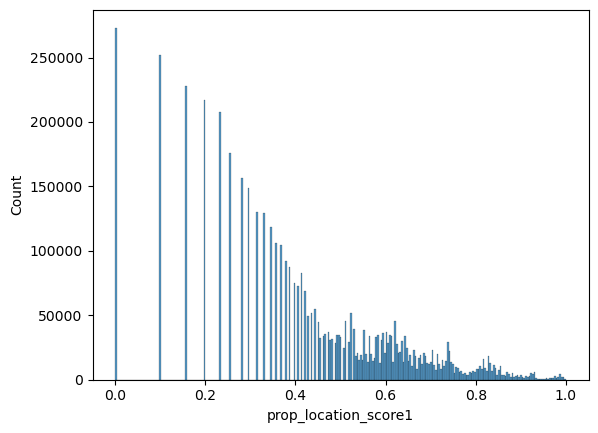

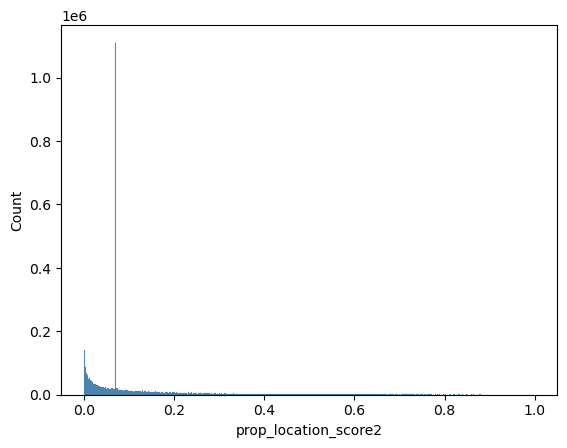

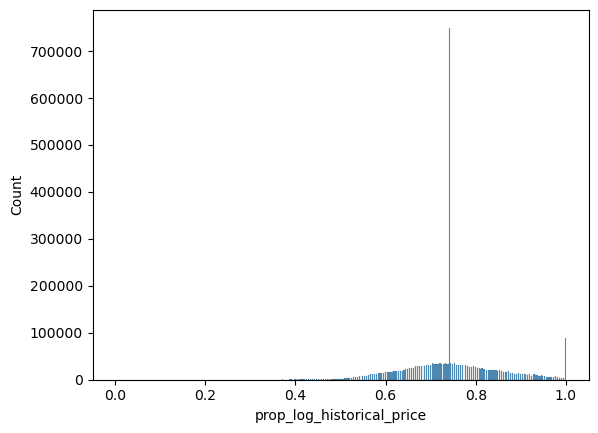

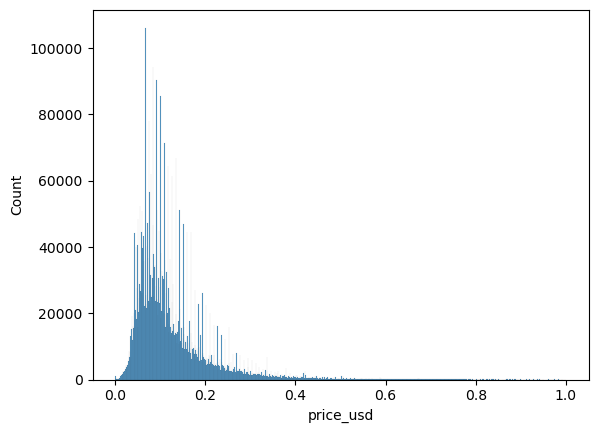

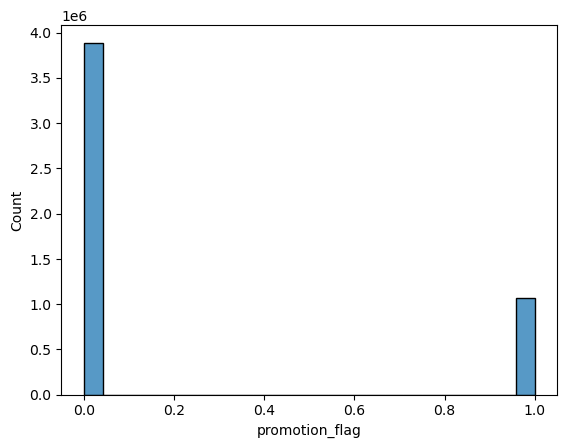

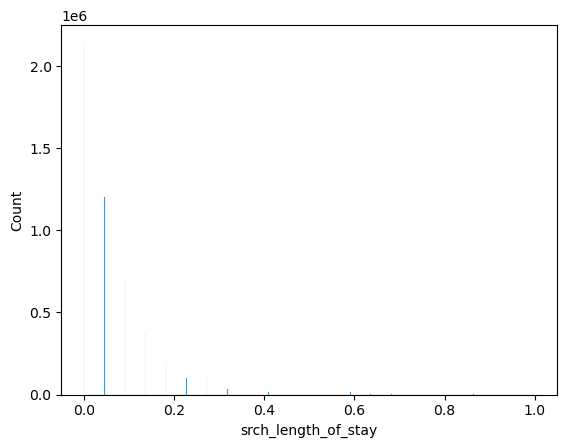

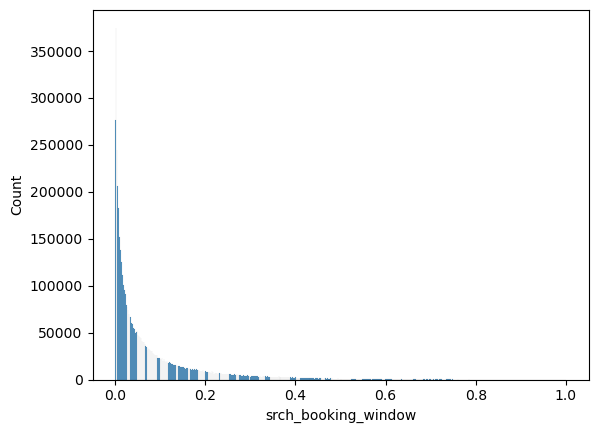

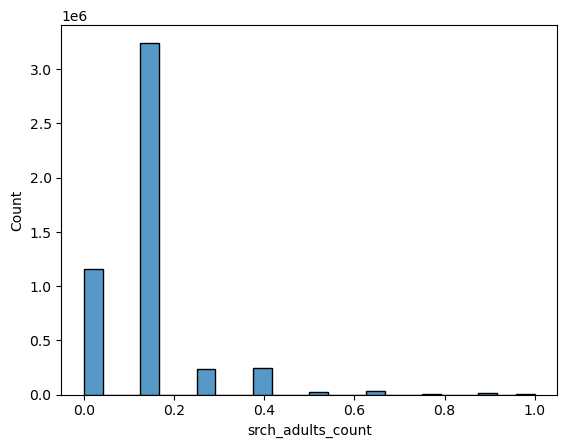

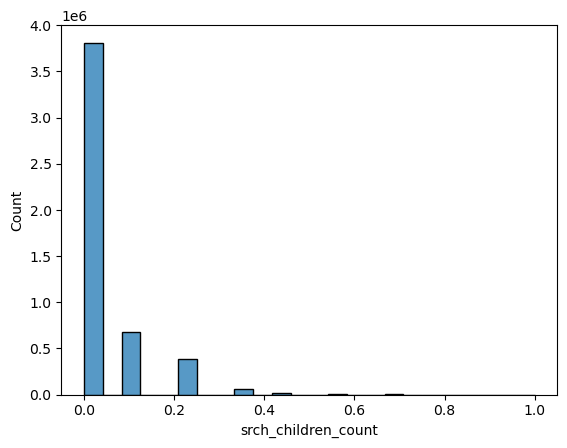

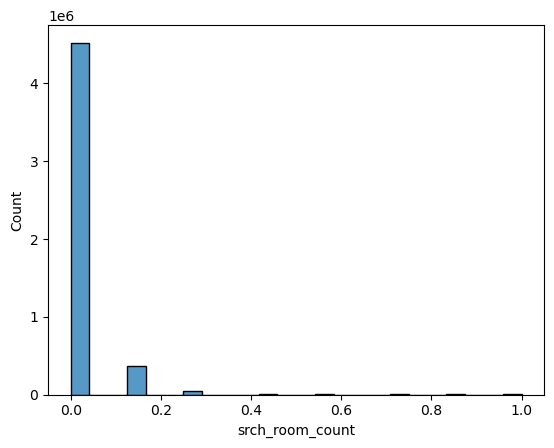

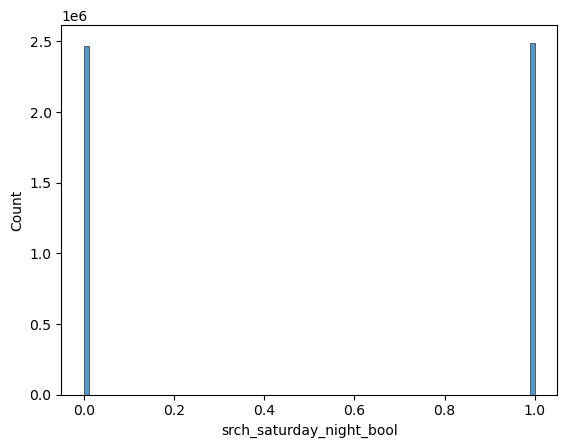

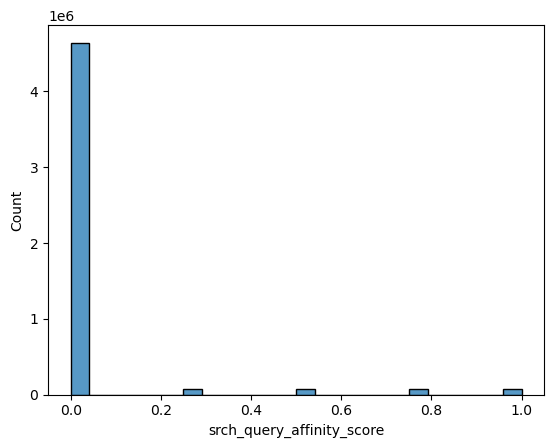

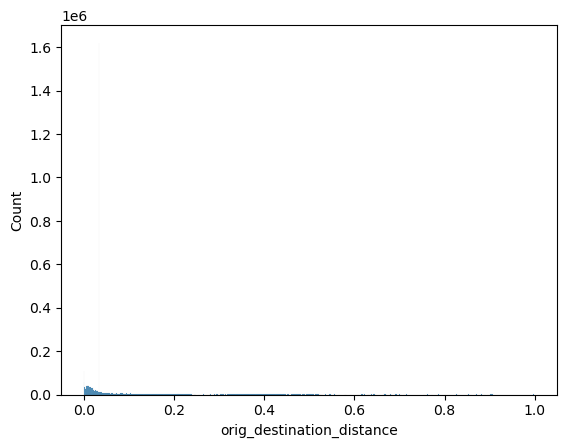

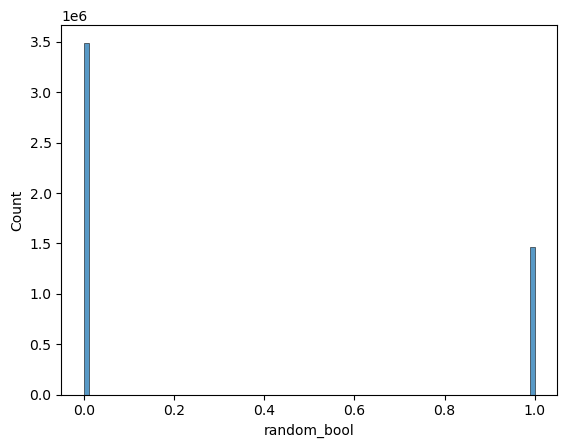

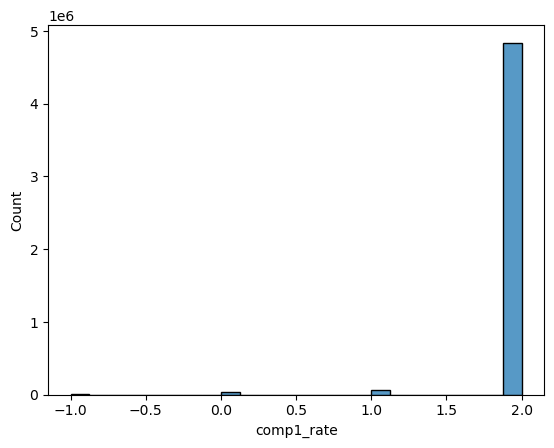

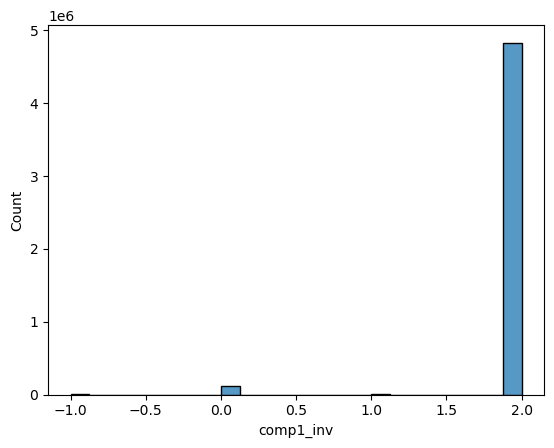

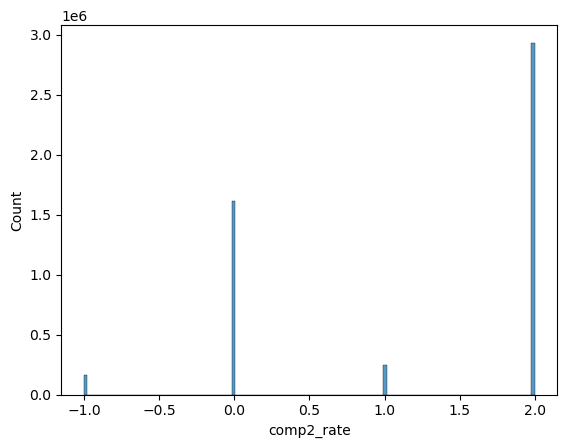

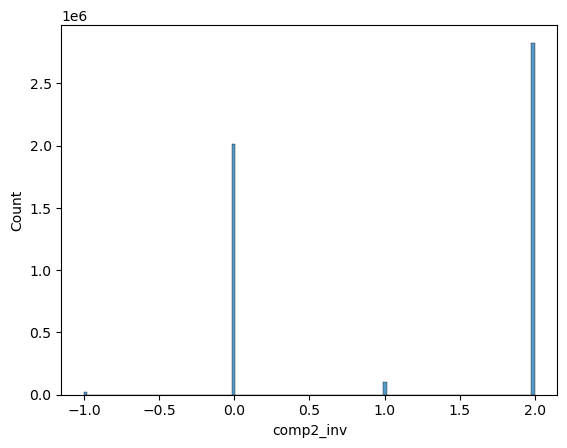

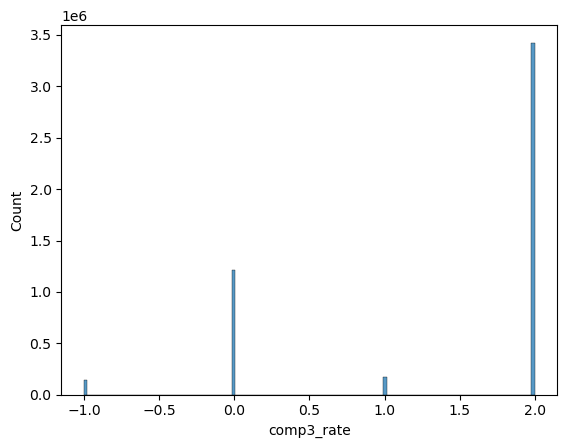

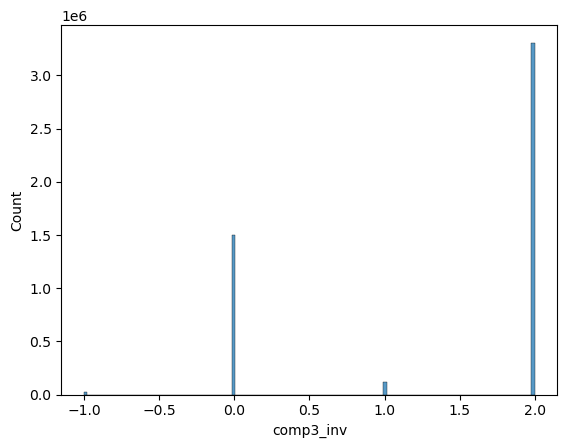

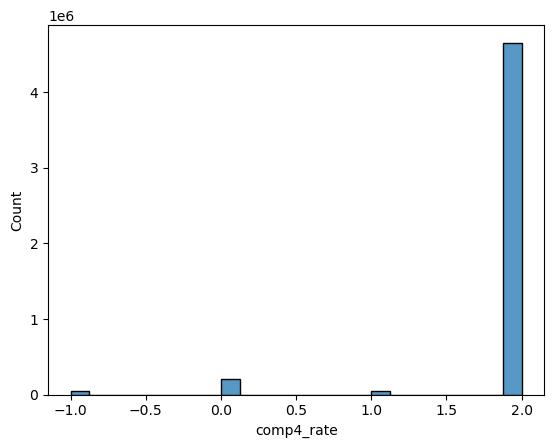

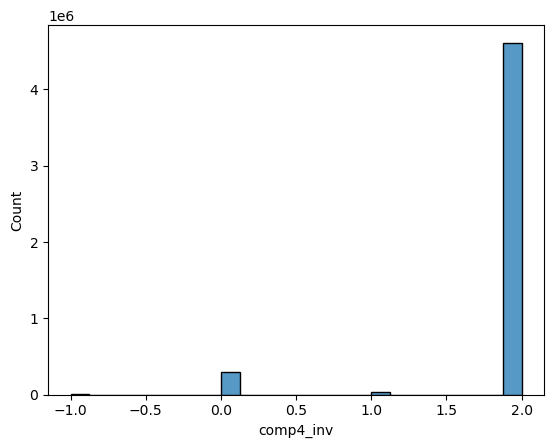

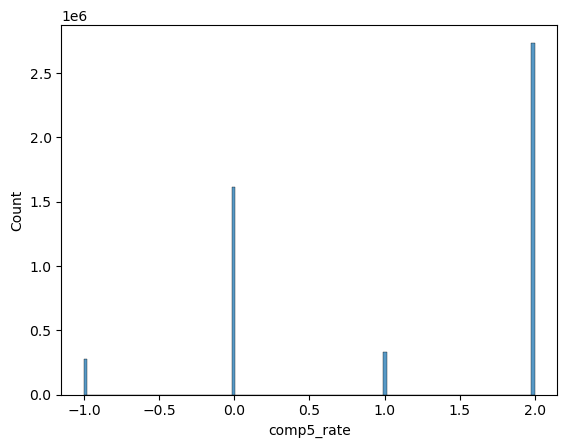

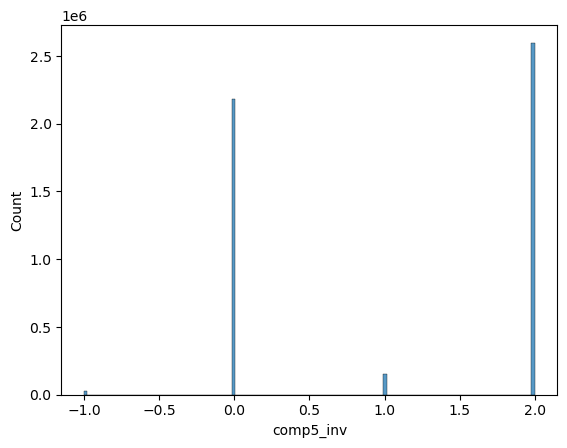

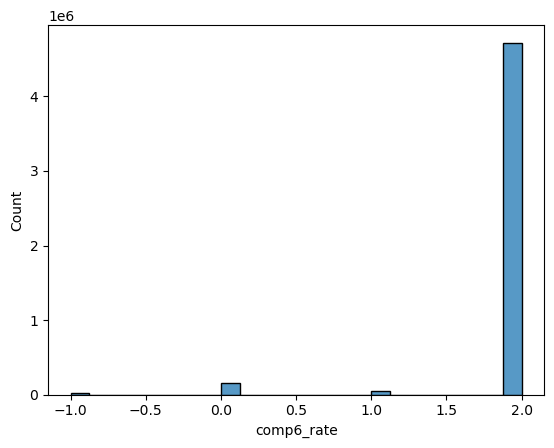

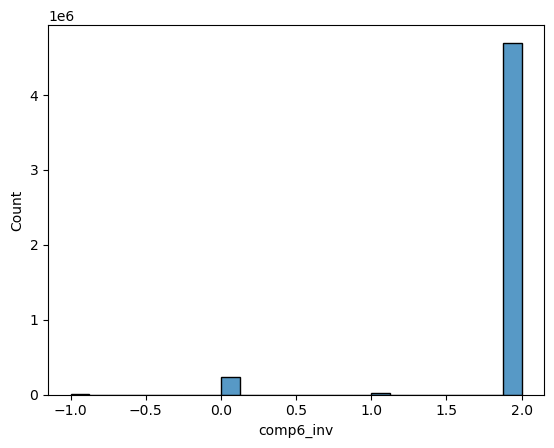

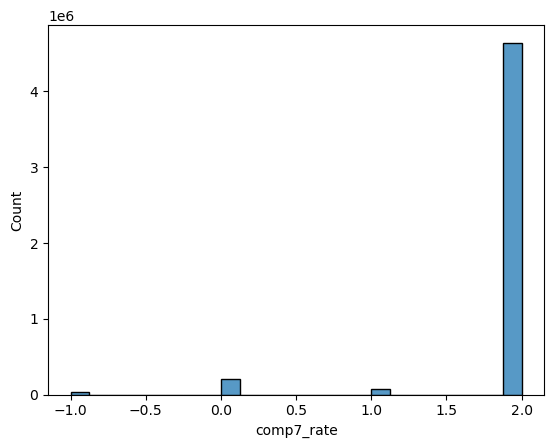

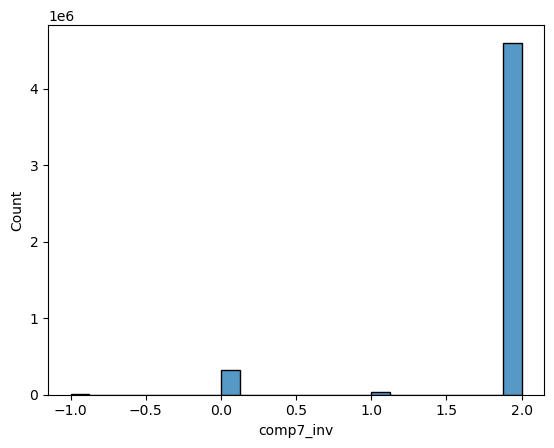

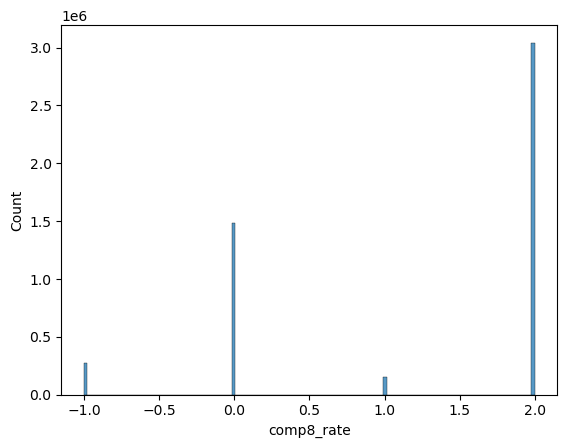

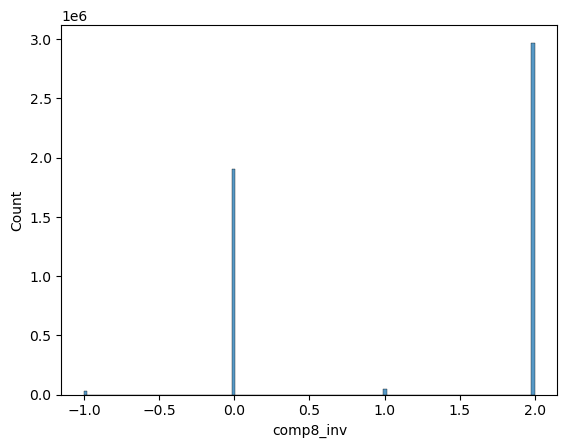

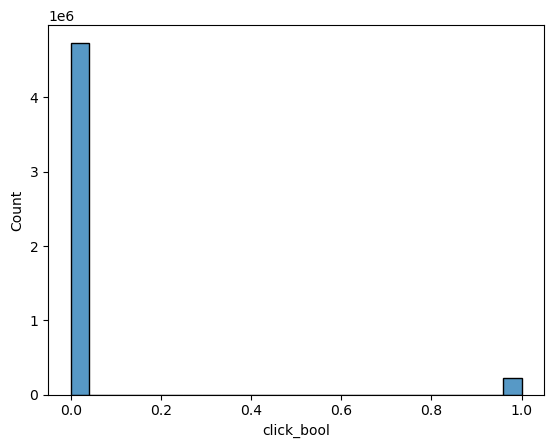

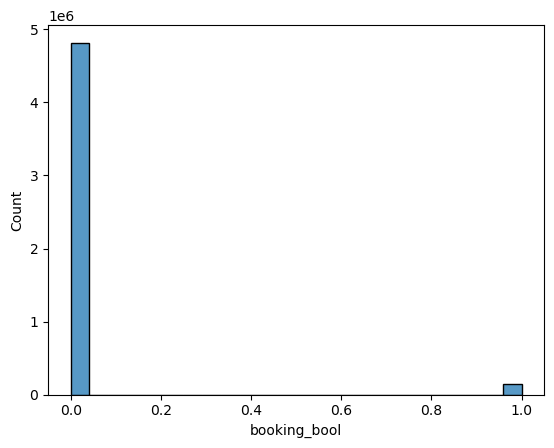

In [38]:
# Drop column(s)
df = df.drop(['srch_id', 'site_id', 'date_time', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'srch_destination_id'], axis=1)

# Get list of column names
cols_to_plot = df.columns.tolist()

# Loop through columns to plot
for col in cols_to_plot:
        plt.figure()
        sns.histplot(data=df, x=col)
        plt.show()